# Codenation Challenge

### Author: Erique Souza

##### In this notebook, I will try to discover which are the best grade of math in ENEM 2016. I will create models to compare which are better to predict these math grades. 

In [1]:
# Import necessaries libraries.
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
#import sklearn
#import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from IPython.display import Image



%matplotlib inline

## Exploratory analysis

In [2]:
# Import test and train dataset
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [3]:
# A short view from train_dataset
train_dataset.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
# A short view from test_dataset
test_dataset.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [5]:
# Columns names of train dataset
train_dataset.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [6]:
# Columns names of test dataset
test_dataset.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [7]:
# Summary of train dataset
train_dataset.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
# Summary of test dataset
test_dataset.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,1480.000000,4576.000000,1480.000000,...,3442.000000,3377.000000,4576.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,30.762019,21.542395,2.181163,1.060970,1.791084,2.119537,1.368663,1.182432,0.127404,2.264865,...,529.195264,514.304205,0.604458,1.095943,119.626888,111.915902,106.384365,112.881256,76.683447,527.491857
std,9.912313,6.854073,1.017531,0.281289,0.875692,3.210353,0.568589,0.572495,0.333461,0.716922,...,73.086665,67.725564,0.489020,0.695047,29.028146,33.296849,33.834492,33.202244,42.985637,151.979490
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,479.725000,468.400000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,532.000000,516.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,540.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,579.550000,562.400000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,65.000000,5.000000,4.000000,4.000000,10.000000,3.000000,3.000000,1.000000,4.000000,...,773.600000,708.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


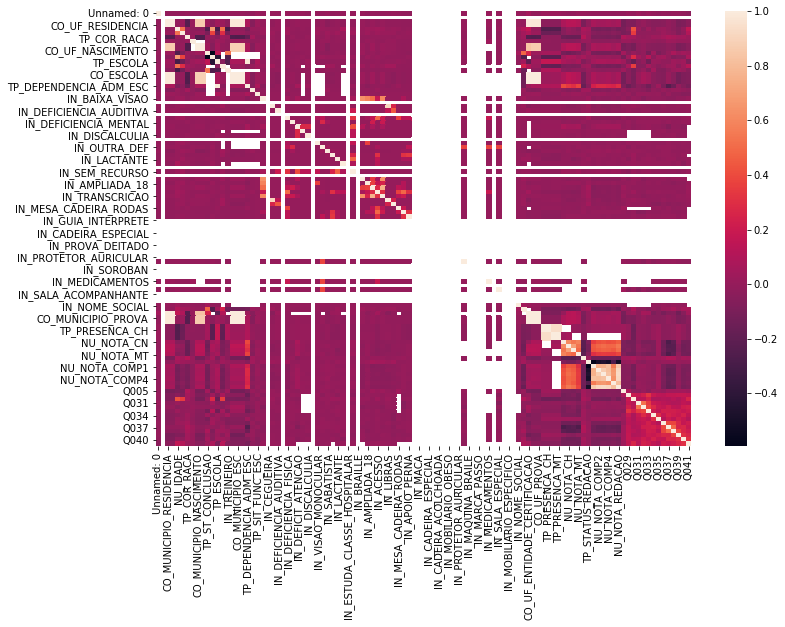

In [9]:
# Correlation between variables in train_dataset

correlation = train_dataset.corr()
plt.subplots(figsize = (12, 8))
sbn.heatmap(correlation)

In [10]:
# Top 10 correlations with the target
correlation = train_dataset.corr()
correlation['NU_NOTA_MT'].sort_values(ascending=False).head(11)

NU_NOTA_MT                1.000000
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_REDACAO           0.379376
TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP5             0.343337
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP1             0.299402
Name: NU_NOTA_MT, dtype: float64

In [11]:
# We will use these columns as resources for my models.
features = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_DEPENDENCIA_ADM_ESC',
           'NU_NOTA_COMP3', 'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1']

new_train_dataset = train_dataset[features]


In [12]:
# We will use these columns as resources for my models.
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_DEPENDENCIA_ADM_ESC',
           'NU_NOTA_COMP3', 'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1']

new_test_dataset = test_dataset[features]


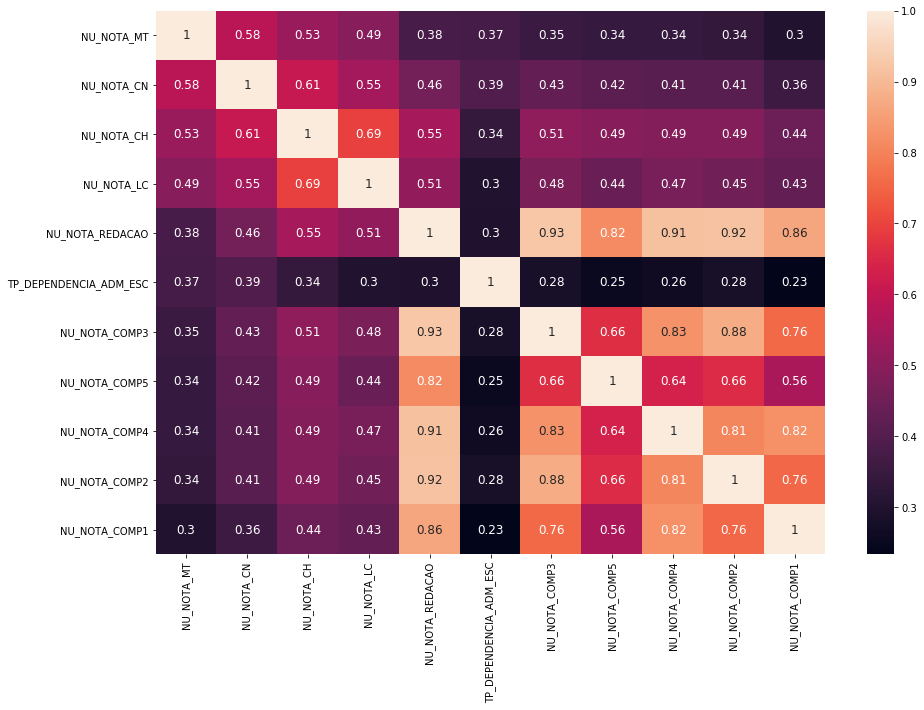

In [13]:
# Now we can see a correlation between variables in new train_dataset
new_corr = new_train_dataset.corr()
plt.subplots(figsize = (15, 10))
sbn.heatmap(new_corr, annot=True, annot_kws={'size':12})

# PLOTAR OS GRÁFICOS DAS NOTAS

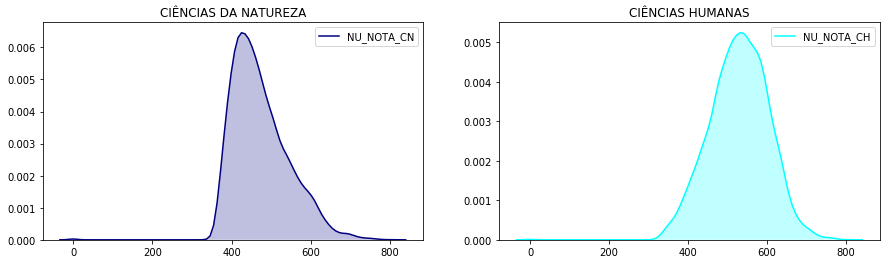

In [14]:
#Plotting a distribution of grades

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sbn.kdeplot(new_train_dataset['NU_NOTA_CN'], ax = axes[0], shade=True, color="navy")
sbn.kdeplot(new_train_dataset['NU_NOTA_CH'], ax = axes[1], shade=True, color="cyan")

axes[0].set_title('CIÊNCIAS DA NATUREZA')
axes[1].set_title('CIÊNCIAS HUMANAS')
plt.show()

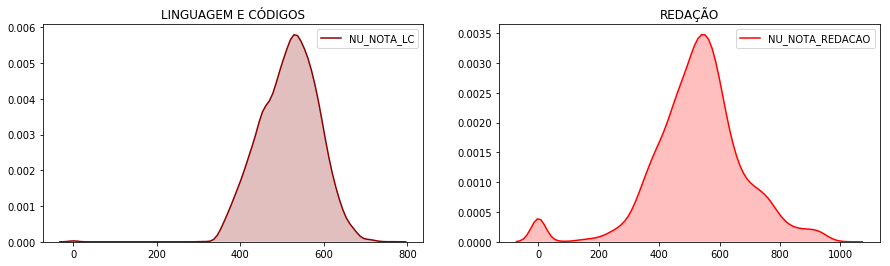

In [15]:
#Plotting a distribution of grades

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sbn.kdeplot(new_train_dataset['NU_NOTA_LC'], ax = axes[0], shade=True, color="darkred")
sbn.kdeplot(new_train_dataset['NU_NOTA_REDACAO'], ax = axes[1], shade=True, color="r")

axes[0].set_title('LINGUAGEM E CÓDIGOS')
axes[1].set_title('REDAÇÃO')
plt.show()

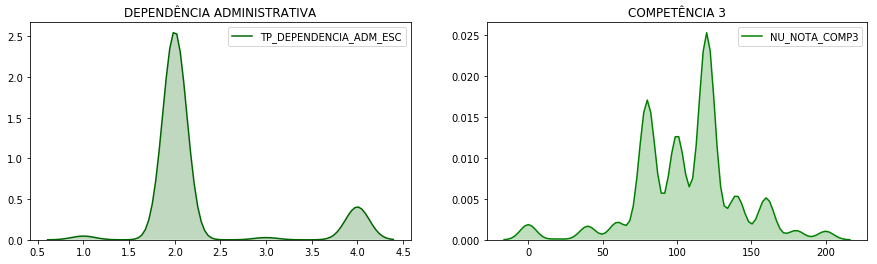

In [16]:
#Plotting a distribution of grades

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sbn.kdeplot(new_train_dataset['TP_DEPENDENCIA_ADM_ESC'], ax = axes[0], shade=True, color="darkgreen")
sbn.kdeplot(new_train_dataset['NU_NOTA_COMP3'], ax = axes[1], shade=True, color="green")

axes[0].set_title('DEPENDÊNCIA ADMINISTRATIVA')
axes[1].set_title('COMPETÊNCIA 3')
plt.show()

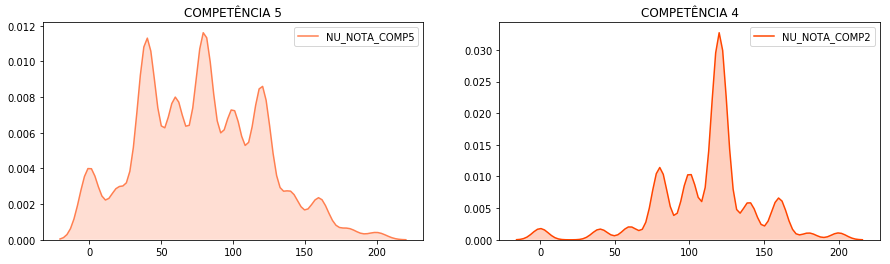

In [17]:
#Plotting a distribution of grades

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sbn.kdeplot(new_train_dataset['NU_NOTA_COMP5'], ax = axes[0], shade=True, color="coral")
sbn.kdeplot(new_train_dataset['NU_NOTA_COMP2'], ax = axes[1], shade=True, color="orangered")

axes[0].set_title('COMPETÊNCIA 5')
axes[1].set_title('COMPETÊNCIA 4')
plt.show()

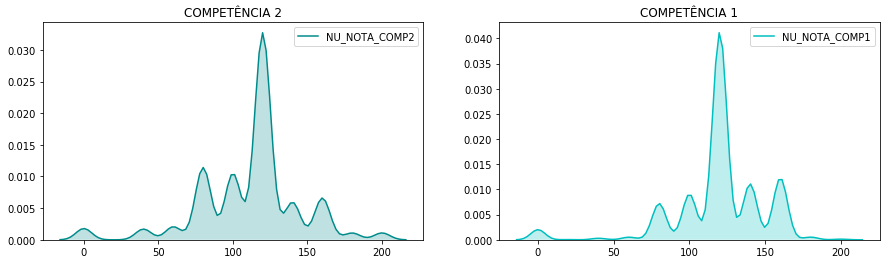

In [18]:
#Plotting a distribution of grades

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sbn.kdeplot(new_train_dataset['NU_NOTA_COMP2'], ax = axes[0], shade=True, color="darkcyan")
sbn.kdeplot(new_train_dataset['NU_NOTA_COMP1'], ax = axes[1], shade=True, color="c")

axes[0].set_title('COMPETÊNCIA 2')
axes[1].set_title('COMPETÊNCIA 1')
plt.show()

In [19]:
#Checking the NaN and Null values.
new_train_dataset.isnull().sum()

NU_NOTA_MT                3597
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
NU_NOTA_REDACAO           3597
TP_DEPENDENCIA_ADM_ESC    9448
NU_NOTA_COMP3             3597
NU_NOTA_COMP5             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP1             3597
dtype: int64

#### Filling with zeros

In [20]:
#Making a copy from datasets
df0_train = new_train_dataset.copy()
df0_test = new_test_dataset.copy()

In [21]:
#Defining a function to fill the data set with zeros.
def fill_zeros(dataset):
    for i in dataset:
        dataset[i] = dataset[i].fillna(0)
    return dataset

In [22]:
df0_train = fill_zeros(df0_train)
df0_test = fill_zeros(df0_test)

#### Filling with mean

In [23]:
#Making a copy from datasets
df1_train = new_train_dataset.copy()
df1_test = new_test_dataset.copy()

In [24]:
#Defining a function to fill the data set with mean.
def fill_mean(dataset):
    for i in dataset:
        dataset[i] = dataset[i].fillna(dataset[i].mean())
    return dataset

In [25]:
df1_train = fill_mean(df1_train)
df1_test = fill_mean(df1_test)

#### Assembling the models

In [26]:
#Defining a function to validate models performance

def model_performance(pipelines, x_train, y_train):
    result =[]
    names = []
    for name, model in pipelines:
        kfold = KFold(n_splits=5, random_state=21, shuffle=True)
        cross_validation = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
        result.append(cross_validation)
        names.append(name)
        message = "%s: %f (%f)" % (name, cross_validation.mean(), cross_validation.std())
        print(message)


In [27]:
#Assembling the pipelines
pipelines = []
pipelines.append(('GBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('RFG', Pipeline([('Scaler', MinMaxScaler()),('RFG', RandomForestRegressor())])))
pipelines.append(('DTR', Pipeline([('Scaler', MinMaxScaler()),('DTR', DecisionTreeRegressor())])))
pipelines.append(('KNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('LR', Pipeline([('Scaler', MinMaxScaler()),('LR',LinearRegression())])))

In [28]:
#Data
y0_train = df0_train['NU_NOTA_MT']
x0_test = df0_test
x0_train = df0_train.drop(columns=['NU_NOTA_MT'])

y1_train = df1_train['NU_NOTA_MT']
x1_test = df1_test
x1_train = df1_train.drop(columns=['NU_NOTA_MT'])

In [29]:
#List of data
x_train = []
y_train = []

x_train.append(x0_train)
x_train.append(x1_train)

y_train.append(y0_train)
y_train.append(y1_train)

In [30]:
#Testing models with datas
for i in range(2):
    print("\n Resultados para o dataframe df%s_train. \n" % i)
    model_performance(pipelines, x_train[i], y_train[i])
    


 Resultados para o dataframe df0_train. 

GBM: -4051.218357 (56.811971)
RFG: -4326.390102 (91.254979)
DTR: -8399.076600 (316.985514)
KNN: -5048.319025 (40.537496)
LR: -5102.510853 (135.281461)

 Resultados para o dataframe df1_train. 

GBM: -4083.385913 (54.452267)
RFG: -4340.987594 (75.458450)
DTR: -8327.674630 (182.237175)
KNN: -5032.951357 (66.281932)
LR: -4427.258927 (90.655694)


### Testing data with 3 best models and data with zeros

#### Gradient Boosting Regressor

In [31]:
GBM = Pipeline([('scaler', StandardScaler()), ('GradientBoostingRegressor', GradientBoostingRegressor())])

In [32]:
CV_GBM = RandomizedSearchCV(estimator = GBM, param_distributions = {},cv = 5,return_train_score=True, verbose=0)

In [33]:
CV_GBM.fit(x0_train, y0_train)
y0_pred_GBM = CV_GBM.predict(x0_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


#### Random Forest Regressor


In [34]:
RFR = Pipeline([('scaler', StandardScaler()), ('RandomForestRegressor', RandomForestRegressor())])

In [35]:
CV_RFR = RandomizedSearchCV(estimator = RFR, param_distributions = {},cv = 5,return_train_score=True, verbose=0)

In [36]:
CV_RFR.fit(x0_train, y0_train)
y0_pred_RFR = CV_RFR.predict(x0_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


#### Linear Regression

In [37]:
LR = Pipeline([('scaler', StandardScaler()), ('LinearRegression', LinearRegression())])

In [38]:
CV_LR = RandomizedSearchCV(estimator = LR, param_distributions = {},cv = 5,return_train_score=True, verbose=0)

In [39]:
CV_LR.fit(x0_train, y0_train)
y0_pred_LR = CV_LR.predict(x0_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


### Testing data with 3 best models and data with mean

#### Gradient Boosting Regressor

In [40]:
GBM_1 = Pipeline([('scaler', StandardScaler()), ('GradientBoostingRegressor', GradientBoostingRegressor())])

In [41]:
CV_GBM_1 = RandomizedSearchCV(estimator = GBM_1, param_distributions = {},cv = 5,return_train_score=True, verbose=0)

In [42]:
CV_GBM_1.fit(x1_train, y1_train);
y1_pred_GBM = CV_GBM_1.predict(x1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


#### Random Forest Regressor


In [43]:
RFR_1 = Pipeline([('scaler', StandardScaler()), ('RandomForestRegressor', RandomForestRegressor())])

In [44]:
CV_RFR_1 = RandomizedSearchCV(estimator = RFR_1, param_distributions = {},cv = 5,return_train_score=True, verbose=0)

In [45]:
CV_RFR_1.fit(x1_train, y1_train)
y1_pred_RFR = CV_RFR.predict(x1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


#### Linear Regression

In [46]:
LR_1 = Pipeline([('scaler', StandardScaler()), ('LinearRegression', LinearRegression())])

In [47]:
CV_LR_1 = RandomizedSearchCV(estimator = LR_1, param_distributions = {},cv = 5,return_train_score=True, verbose=0)

In [48]:
CV_LR_1.fit(x1_train, y1_train)
y1_pred_LR = CV_LR_1.predict(x1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


#### Saving answers

In [49]:
answer_1 = pd.DataFrame()
answer_1['NU_INSCRICAO'] = test_dataset['NU_INSCRICAO']
answer_1['NU_INSCRICAO'].head()       

0    73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1    71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2    b38a03232f43b11c9d0788abaf060f7366053b6d
3    70b682d9a3636be23f6120fa9d6b164eb3c6002d
4    715494628a50142ce8cb17191cfe6d0f3cae0934
Name: NU_INSCRICAO, dtype: object

In [50]:
answer_1['NU_NOTA_MT'] = y0_pred_GBM

In [51]:
answer_1.to_csv('./1/answer.csv', index=False, header=True)

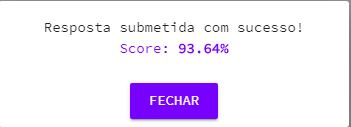

In [52]:
Image('./1/capturar.jpg')

In [53]:
answer_2 = pd.DataFrame()
answer_2['NU_INSCRICAO'] = test_dataset['NU_INSCRICAO']
answer_2['NU_INSCRICAO'].head()       

0    73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1    71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2    b38a03232f43b11c9d0788abaf060f7366053b6d
3    70b682d9a3636be23f6120fa9d6b164eb3c6002d
4    715494628a50142ce8cb17191cfe6d0f3cae0934
Name: NU_INSCRICAO, dtype: object

In [54]:
answer_2['NU_NOTA_MT'] = y0_pred_RFR

In [55]:
answer_2.to_csv('./2/answer.csv', index=False, header=True)

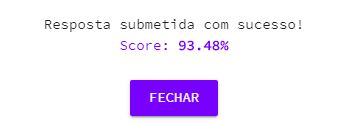

In [56]:
Image('./2/capturar.jpg')

In [57]:
answer_3 = pd.DataFrame()
answer_3['NU_INSCRICAO'] = test_dataset['NU_INSCRICAO']
answer_3['NU_INSCRICAO'].head()       

0    73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1    71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2    b38a03232f43b11c9d0788abaf060f7366053b6d
3    70b682d9a3636be23f6120fa9d6b164eb3c6002d
4    715494628a50142ce8cb17191cfe6d0f3cae0934
Name: NU_INSCRICAO, dtype: object

In [58]:
answer_3['NU_NOTA_MT'] = y0_pred_LR

In [59]:
answer_3.to_csv('./3/answer.csv', index=False, header=True)

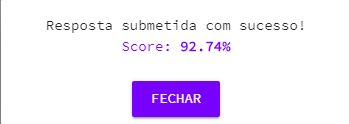

In [60]:
Image('./3/capturar.jpg')

In [61]:
answer_4 = pd.DataFrame()
answer_4['NU_INSCRICAO'] = test_dataset['NU_INSCRICAO']
answer_4['NU_INSCRICAO'].head()       

0    73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1    71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2    b38a03232f43b11c9d0788abaf060f7366053b6d
3    70b682d9a3636be23f6120fa9d6b164eb3c6002d
4    715494628a50142ce8cb17191cfe6d0f3cae0934
Name: NU_INSCRICAO, dtype: object

In [62]:
answer_4['NU_NOTA_MT'] = y1_pred_GBM

In [63]:
answer_4.to_csv('./4/answer.csv', index=False, header=True)

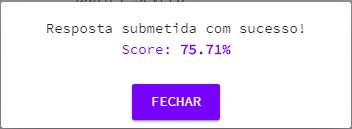

In [64]:
Image('./4/capturar.jpg')

In [65]:
answer_5 = pd.DataFrame()
answer_5['NU_INSCRICAO'] = test_dataset['NU_INSCRICAO']
answer_5['NU_INSCRICAO'].head()       

0    73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1    71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2    b38a03232f43b11c9d0788abaf060f7366053b6d
3    70b682d9a3636be23f6120fa9d6b164eb3c6002d
4    715494628a50142ce8cb17191cfe6d0f3cae0934
Name: NU_INSCRICAO, dtype: object

In [66]:
answer_5['NU_NOTA_MT'] = y1_pred_RFR

In [67]:
answer_5.to_csv('./5/answer.csv', index=False, header=True)

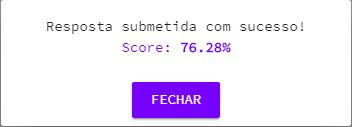

In [68]:
Image('./5/capturar.jpg')

In [69]:
answer_6 = pd.DataFrame()
answer_6['NU_INSCRICAO'] = test_dataset['NU_INSCRICAO']
answer_6['NU_INSCRICAO'].head()       

0    73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1    71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2    b38a03232f43b11c9d0788abaf060f7366053b6d
3    70b682d9a3636be23f6120fa9d6b164eb3c6002d
4    715494628a50142ce8cb17191cfe6d0f3cae0934
Name: NU_INSCRICAO, dtype: object

In [70]:
answer_6['NU_NOTA_MT'] = y1_pred_LR

In [71]:
answer_6.to_csv('./6/answer.csv', index=False, header=True)

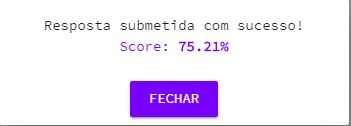

In [72]:
Image('./6/capturar.jpg')